**Import Necessary Libraries**


In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

###  Data Preprocessing and EDA

In [4]:
df = pd.read_csv("hotel_reservations.csv")
print("Number of rows and columns:", df.shape)
print("First few rows of the dataset:")
df.head()

Number of rows and columns: (36275, 19)
First few rows of the dataset:


,booking_id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df = df.drop(['booking_id', 'arrival_year', 'arrival_month', 'arrival_date'], axis=1)

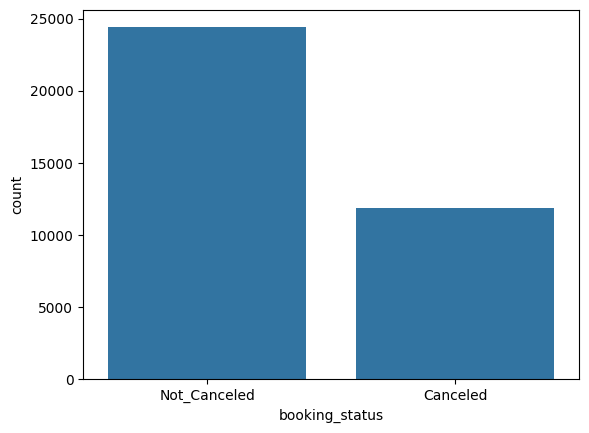

In [6]:
sns.countplot(x='booking_status', data=df)
plt.show()

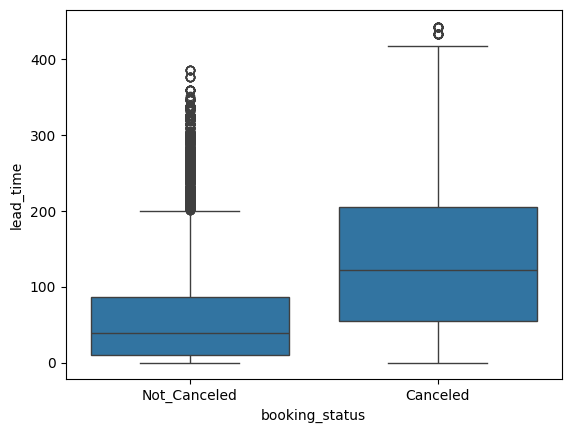

In [7]:
sns.boxplot(x='booking_status', y='lead_time', data=df)
plt.show()

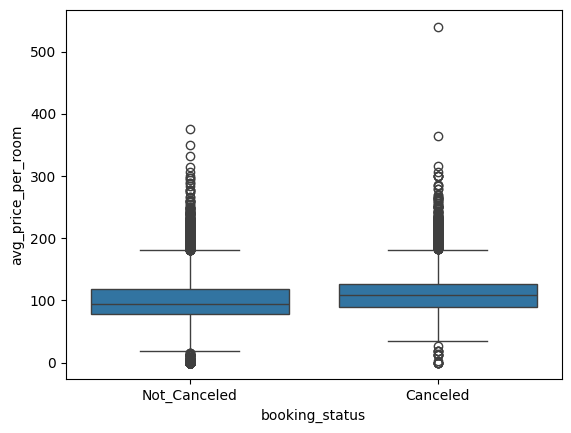

In [8]:
sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.show() 

In [9]:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True)

In [10]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,0,0,0,65.00,...,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,0,0,0,106.68,...,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,0,0,0,60.00,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,0,0,0,100.00,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,0,0,0,94.50,...,False,False,False,False,False,False,False,False,False,True


###  Feature Scaling

In [11]:
scaler = StandardScaler()
df[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

### Implementing K-Fold Cross Validation

In [12]:

# Initialize KFold with 7 splits.
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Cross validation with Naive Bayes
nb_model = GaussianNB()
nb_cv_score = cross_val_score(nb_model, X, y, cv=kf, scoring="accuracy")
print("Naive Bayes Cross-Validation Accuracy: ", nb_cv_score.mean())

# Cross validation with Logistic Regression
lr_model = LogisticRegression()
lr_cv_score = cross_val_score(lr_model, X, y, cv=kf, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy: ", lr_cv_score.mean())


# Cross validation with Decision Tree
dt_model = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_model, X, y, cv=kf, scoring="accuracy")
print("Decision Tree Cross-Validation Accuracy: ", dt_cv_score.mean())


Naive Bayes Cross-Validation Accuracy:  0.4086008945293444
Logistic Regression Cross-Validation Accuracy:  0.8004961614907081
Decision Tree Cross-Validation Accuracy:  0.8574502214909394


### Implementing Stratified K-Fold Cross Validation



In [13]:
# Initialize a StratifiedKFold cross-validator with 7 splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified k-fold cross-validation using Naive Bayes
nb_skf_score = cross_val_score(nb_model, X, y, cv=skf, scoring="accuracy")
print("Naive Bayes Stratified Cross-Validation Accuracy: ", nb_skf_score.mean())


# Perform stratified k-fold cross-validation using a Logistic Regression
lr_skf_score = cross_val_score(lr_model, X, y, cv=skf, scoring="accuracy")
print("Logistic Regression Stratified Cross-Validation Accuracy: ", lr_skf_score.mean())


# Perform stratified k-fold cross-validation using a Decision Tree classifier
dt_skf_score = cross_val_score(dt_model, X, y, cv=skf, scoring="accuracy")
print("Decision Tree Stratified Cross-Validation Accuracy: ", dt_skf_score.mean())


Naive Bayes Stratified Cross-Validation Accuracy:  0.4084906960716747
Logistic Regression Stratified Cross-Validation Accuracy:  0.8010475534114404
Decision Tree Stratified Cross-Validation Accuracy:  0.8558235699517575


###  Implementing Grid Search CV


In [14]:
# Initialize GridSearchCV with Naive Bayes and Random Forest 
model_params = {
    'naive_bayes': {
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10, 50, 100],
            'max_depth': [5, 10, 15]          
        }
    }
}


# Fit GridSearchCV with Naive Bayes and Random Forest, and find the best parameters.
scores = []
for key, val in model_params.items():
    clf = GridSearchCV(
        val['model'],
        val['params'],
        cv=7,
        return_train_score=False
    )
    clf.fit(X, y)
    scores.append({
        'model': key,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })


# Print the best parameters for each model.
df_scores = pd.DataFrame(scores, columns=["model", "best_score", "best_params"])
df_scores

,model,best_score,best_params
0,naive_bayes,0.409483,{'var_smoothing': 1e-07}
1,random_forest,0.877850,"{'max_depth': 15, 'n_estimators': 100}"


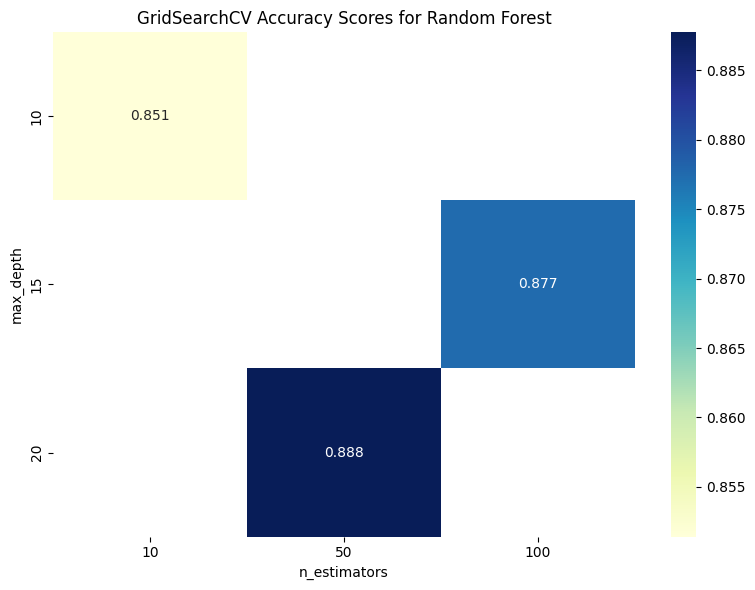

In [19]:
results = pd.DataFrame(clf.cv_results_)
pivot = results.pivot(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("GridSearchCV Accuracy Scores for Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.savefig("gridsearch_results.png")  
plt.show()


### Implementing Randomized Search CV

In [15]:
# Initialize RandomizedSearchCV and fit with RandomForest model
clf = RandomizedSearchCV(
    RandomForestClassifier(),
    {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 15, 20]},
    cv=7,
    return_train_score=False,
    n_iter=3
)
clf.fit(X, y)

# Print Best Parameters
print("Best Parameters for Random Forest (RandomizedSearchCV): ", clf.best_params_)
df = pd.DataFrame(clf.cv_results_)
df

Best Parameters for Random Forest (RandomizedSearchCV):  {'n_estimators': 50, 'max_depth': 20}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,3.191910,0.114049,0.156532,0.024373,50,20,"{'n_estimators': 50, 'max_depth': 20}",0.888482,0.889811,0.890969,0.886144,0.889039,0.881899,0.887881,0.887746,0.002768,1
1,5.227263,0.243373,0.186928,0.033794,100,15,"{'n_estimators': 100, 'max_depth': 15}",0.880378,0.883636,0.878232,0.877074,0.879197,0.871864,0.872057,0.877491,0.003981,2
2,0.451554,0.062500,0.038472,0.010773,10,10,"{'n_estimators': 10, 'max_depth': 10}",0.869381,0.859321,0.847356,0.836357,0.852953,0.849286,0.845234,0.851412,0.009810,3


In [16]:

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0 or 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20, random_state=42, stratify=y_encoded)


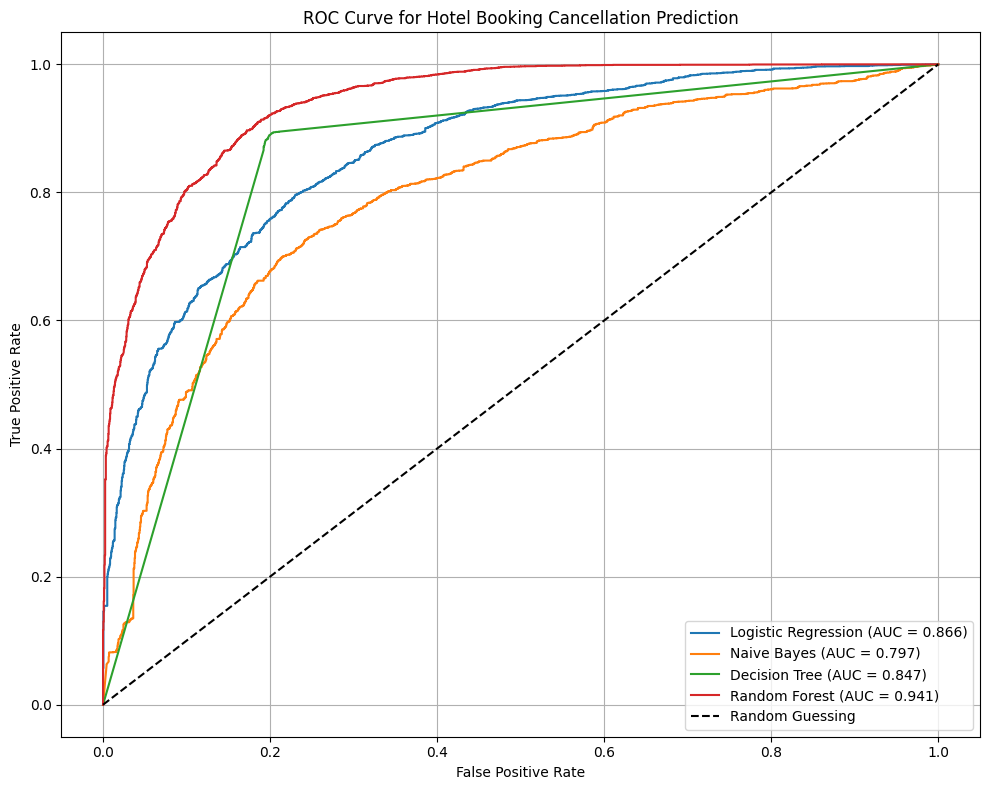

In [21]:

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=15),  # use best from GridSearch
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Use predict_proba for AUC-ROC (for probability scores)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot the random guessing line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Hotel Booking Cancellation Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig("roc_auc.png")
plt.show()
